# BHARAT INTERNSHIP - TASK 1

## NETFLIX STOCK PRICE PREDICTION USING LSTM

### STEP 1 : Import the necessary libraries:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

### STEP 2 : Import the dataset

In [2]:
netflix = pd.read_csv('NFLX.csv') 
netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


### STEP 3 : Data exploration and cleaning

In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [4]:
netflix.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
netflix[ 'Date'] = pd.to_datetime(netflix['Date']) 
netflix.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
netflix[ 'Year'] = netflix['Date'].apply(lambda x: str(x)[:4]) 
netflix[ 'Month'] = netflix['Date'].apply(lambda x: str(x)[5:7]) 
netflix[ 'Day'] = netflix['Date'].apply(lambda x: str(x)[8:10]) 
netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,02,05
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,02,06
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,02,07
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,02,08
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,02,09


In [7]:
class color:
    GREEN = '\033[92m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
    GREEN_BOLD = GREEN + BOLD 
    RED_BOLD = RED + BOLD
    GREEN_BOLD_UNDERLINE = GREEN_BOLD + UNDERLINE

rb = color.RED_BOLD
gb = color.GREEN_BOLD
gbu = color.GREEN_BOLD_UNDERLINE
end = color.END

In [8]:
print(f'{rb}Total number of trading days: {end}{gbu}{netflix.shape[0]}{end}')
print(f'{rb}Total number of fields: {end}{gbu}{netflix.shape[1]}{end}')
print("\n")  # You had an extra single quote here; I removed it.

# Check the Null and NA values
print(f'{rb}Null values: {end}{gbu}{netflix.isnull().values.sum()}{end}')
print(f'{rb}NA values: {end}{gbu}{netflix.isna().values.any()}{end}')

Total number of trading days: 1009
Total number of fields: 10


Null values: 0
NA values: False


In [9]:
netflix_df = netflix[ 'Open'].values

In [10]:
netflix_df = netflix_df.reshape(-1, 1)

### STEP 4 : Training and Testing of Dataset

In [11]:
netflix_train = np.array(netflix_df[:int(netflix_df.shape[0]*0.8)])
netflix_test = np.array(netflix_df[int (netflix_df.shape[0]*0.8):])

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
netflix_train = scaler.fit_transform(netflix_train)
netflix_test = scaler.transform(netflix_test)
print(netflix_test.shape)

(202, 1)


In [13]:
def create_dataset (netflix_df):
    x= []
    y= []
    for i in range(50, netflix_df.shape[0]):
        x.append(netflix_df[i-50:i, 0])
        y.append(netflix_df[i, 0])
    x = np.array(x)
    y= np.array(y) 
    return x,y

In [14]:
x_train, y_train = create_dataset(netflix_train) 
x_test, y_test = create_dataset(netflix_test)

In [15]:
x_train = np.reshape(x_train, (x_train. shape[0], x_train.shape[1], 1)) 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### STEP 5 : Create sequences of data for the LSTM model

In [16]:
model = Sequential()
model.add(LSTM(units=56, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add (Dropout(0.2)) 
model.add(Dense(units=1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 56)            12992     
                                                                 
 dropout (Dropout)           (None, 50, 56)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            58752     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [18]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
model.compile(loss='mean_squared_error', optimizer="adam")

### Predicitve Analysis

In [20]:
epochs = 20 
batch_size = 64
#Save the model and start the training
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size) 
model.save('stock_prediction')

Epoch 1/20
12/12 [==============================] - 20s 384ms/step - loss: 0.0652
Epoch 2/20
12/12 [==============================] - 5s 392ms/step - loss: 0.0163
Epoch 3/20
12/12 [==============================] - 4s 372ms/step - loss: 0.0114
Epoch 4/20
12/12 [==============================] - 4s 369ms/step - loss: 0.0076
Epoch 5/20
12/12 [==============================] - 5s 378ms/step - loss: 0.0076
Epoch 6/20
12/12 [==============================] - 4s 366ms/step - loss: 0.0079
Epoch 7/20
12/12 [==============================] - 5s 408ms/step - loss: 0.0078
Epoch 8/20
12/12 [==============================] - 5s 421ms/step - loss: 0.0078
Epoch 9/20
12/12 [==============================] - 5s 407ms/step - loss: 0.0080
Epoch 10/20
12/12 [==============================] - 5s 394ms/step - loss: 0.0073
Epoch 11/20
12/12 [==============================] - 5s 420ms/step - loss: 0.0071
Epoch 12/20
12/12 [==============================] - 4s 371ms/step - loss: 0.0072
Epoch 13/20
12/12 [=====

INFO:tensorflow:Assets written to: stock_prediction\assets


In [21]:
from tensorflow.keras.models import load_model

In [22]:
model = load_model('stock_prediction')

In [23]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) 
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

5/5 [==============================] - 4s 80ms/step


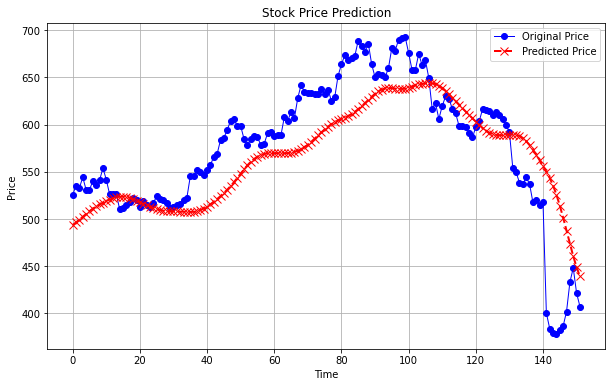

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, color='blue', marker='o', linestyle='-', linewidth=1, markersize=6, label='Original Price')
plt.plot(predictions, color='red', marker='x', linestyle='--', linewidth=2, markersize=8, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()